In [1]:
import matplotlib.pyplot as plt
import numpy as np

from BNNLayer import BNNLayer
from BNN import BNN

import torch
from torch.autograd import Variable

In [17]:
x = np.random.uniform(-4, 4, size=20).reshape((-1, 1))
noise = np.random.normal(0, 9, size=20).reshape((-1, 1))

def true_func(x):
    return x**3 

y = true_func(x) + 0.1*noise

In [18]:
Var = lambda x, dtype=torch.FloatTensor: Variable(torch.from_numpy(x).type(dtype))
X = Var(x)
Y = Var(y)

n = 1

In [19]:
bnn = BNN(BNNLayer(1, 100, activation='relu', prior_mean=0, prior_rho=0),
          BNNLayer(100, 1, activation='none', prior_mean=0, prior_rho=0))

optim = torch.optim.Adam(bnn.parameters(), lr=1e-1)

In [20]:
for i_ep in range(1000):
    kl, lg_lklh = bnn.Forward(X, Y, 1, 'Gaussian')
    loss = BNN.loss_fn(kl, lg_lklh, 1)
    optim.zero_grad()
    loss.backward()
    optim.step()

In [21]:
x_ = np.linspace(-5, 5)
y_ = x_**3
X_ = Var(x_).unsqueeze(1)

pred_lst = [bnn.forward(X_, mode='MC').data.numpy().squeeze(1) for _ in range(100)]

pred = np.array(pred_lst).T
pred_mean = pred.mean(axis=1)
pred_std = pred.std(axis=1)

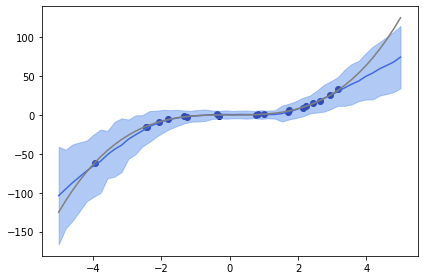

In [26]:
plt.scatter(x, y, c='navy', label='Sampled Data')
plt.plot(x_, pred_mean, c='royalblue', label='Mean Prediction')
plt.fill_between(x_, pred_mean - 7 * pred_std, pred_mean + 7 * pred_std,
                 color='cornflowerblue', alpha=.5, label='+/- 3 std')

plt.plot(x_, y_, c='grey', label='True Function')


plt.tight_layout()
#plt.savefig('test.pdf')
plt.show()

In [27]:
import GPy

In [85]:
no_points = 100
x = np.random.uniform(0, 0.5, no_points)[:, None]
x.sort(axis = 0)

e = np.random.normal(0, 0.02, no_points).reshape((no_points, 1))
y = x + 0.3 * np.sin(2 * np.pi * (x + e)) + 0.3 * np.sin(4 * np.pi * (x + e)) + e
'''
x_mean = np.mean(x)
x_std = np.std(x)
x_train = (x - x_mean)/x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_train = (y - y_mean)/y_std
'''
x_linspace = np.linspace(-0.2, 0.7, 200)

In [65]:
y_mean

0.4299233274294988

In [60]:
rbf = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
gpr = GPy.models.GPRegression(x, y, rbf)
gpr.optimize()

gp_mean, gp_var = gpr.predict(x_linspace.reshape(200,1))
gp_std = np.sqrt(gp_var)

means = gp_mean
std = gp_std

In [66]:
means = means - y_mean

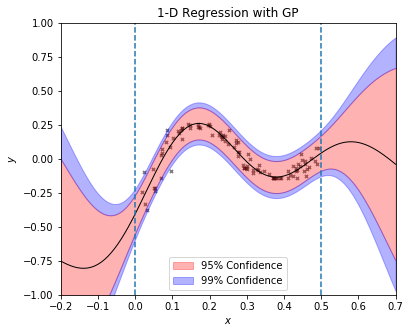

In [69]:
plt.figure(figsize = (6, 5))
plt.scatter(x,y - y_mean, s = 10, marker = 'x', color = 'black', alpha = 0.5)
plt.fill_between(x_linspace.reshape(200,), (means - 1.96*std).reshape(200,), (means + 1.96*std).reshape(200,), color = 'red', alpha = 0.3, label = '95% Confidence')
plt.fill_between(x_linspace.reshape(200,), (means - 2.58*std).reshape(200,), (means - 1.96*std).reshape(200,), color = 'blue', alpha = 0.3, label = '99% Confidence')
plt.fill_between(x_linspace.reshape(200,), (means + 1.96*std).reshape(200,), (means + 2.58*std).reshape(200,), color = 'blue', alpha = 0.3)

plt.plot(x_linspace, means, color = 'black', linewidth = 1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim((-0.2, 0.7))
plt.title('1-D Regression with GP')
plt.tick_params()
plt.legend()
plt.ylim((-1,1))
plt.axvline(x=0, linestyle='--')
plt.axvline(x=0.5, linestyle='--')
plt.savefig('gp_homo.pdf', bbox_inches = 'tight')
plt.show()

In [41]:
means - 1.96*std

array([[ 0.70270724],
       [ 0.69882782],
       [ 0.69456673],
       [ 0.68992816],
       [ 0.68491641],
       [ 0.6795358 ],
       [ 0.67379073],
       [ 0.66768565],
       [ 0.66122505],
       [ 0.65441348],
       [ 0.64725555],
       [ 0.63975592],
       [ 0.63191927],
       [ 0.62375037],
       [ 0.61525399],
       [ 0.60643497],
       [ 0.5972982 ],
       [ 0.58784858],
       [ 0.57809108],
       [ 0.56803068],
       [ 0.55767242],
       [ 0.54702136],
       [ 0.5360826 ],
       [ 0.52486128],
       [ 0.51336254],
       [ 0.50159159],
       [ 0.48955364],
       [ 0.47725393],
       [ 0.46469775],
       [ 0.45189037],
       [ 0.43883713],
       [ 0.42554336],
       [ 0.41201442],
       [ 0.39825569],
       [ 0.38427256],
       [ 0.37007045],
       [ 0.35565478],
       [ 0.341031  ],
       [ 0.32620457],
       [ 0.31118095],
       [ 0.29596561],
       [ 0.28056405],
       [ 0.26498175],
       [ 0.24922423],
       [ 0.23329698],
       [ 0

ValueError: Input passed into argument "'y1'"is not 1-dimensional.

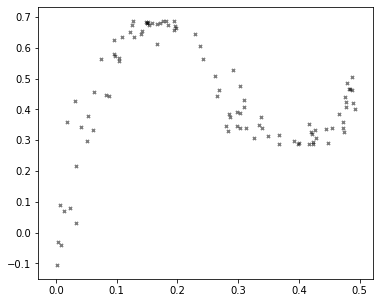

In [40]:
plt.figure(figsize = (6, 5))
# plt.style.use('default')
plt.scatter((x_train * x_std) + x_mean, (y_train * y_std) + y_mean, s = 10, marker = 'x', color = 'black', alpha = 0.5)
plt.fill_between(np.linspace(-5, 5, 200)*x_std + x_mean, means - 1.96*std, means + 1.96*std, color = 'red', alpha = 0.3, label = '95% Confidence')

plt.fill_between(np.linspace(-5, 5, 200)*x_std + x_mean, means - 2.58*std, means - 1.96*std, color = 'blue', alpha = 0.3, label = '99% Confidence')
plt.fill_between(np.linspace(-5, 5, 200)*x_std + x_mean, means + 1.96*std, means + 2.58*std, color = 'blue', alpha = 0.3)



plt.plot(np.linspace(-5, 5, 200)*x_std + x_mean, means, color = 'black', linewidth = 1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim((-0.2, 0.7))
plt.title('1-D Regression with Bayes by Backprop')
plt.tick_params()
plt.legend()
plt.ylim((-1,1))
plt.axvline(x=0, linestyle='--')
plt.axvline(x=0.5, linestyle='--')
plt.savefig('bbp_homo.pdf', bbox_inches = 'tight')

plt.show()

In [70]:
import autograd.numpy as np
import autograd.numpy.random as npr
import autograd.scipy.stats as ss
from autograd.misc import flatten
from autograd.misc.optimizers import adam
from tqdm import trange, tqdm, tqdm_notebook

from autograd import grad

In [71]:
class mc_dropout():
    '''
    Implement MC Dropout MLP with tanh activation.
    Initial arguments:
    layers - list of number of neurons per layer
    d_rate - list of dropout rate per layer, first layer fixed rate 1.0
             so len(d_rate) = len(layers) - 1. 
             NOTE: d_rate = 1.0 means NO dropout as opposed to all 
             neurons dropped.
    
    Trained under squared error loss using Adam.
    
    Use:
    ex = mc_dropout(layers,d_rate)
    ex.train(train_x,train_y,1000)
    ex.forward_pass(test_x)
    '''
    def __init__(self, layers, d_rate):
        
        self.layers = layers
        self.d_rate = d_rate
        
        self.params = self.init_random_params(layer_sizes = layers)
    
    @staticmethod
    def init_random_params(layer_sizes, scale=0.1, rs=npr.RandomState(0)):

        return [(rs.randn(insize, outsize) * scale,   # weight matrix
                 rs.randn(outsize) * scale)           # bias vector
                for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]
    
    def forward_pass(self,params,inputs):
        # Simple MLP, repeated matrix multiplication plus bias
        # Applies tanh activation followed by bernoulli dropout mask
        
        for (W, b), d_rate in zip(params,self.d_rate):
            
            mask = npr.binomial(1, d_rate, size = len(b))
            
            outputs = (np.dot(inputs, W) + b)
            inputs = np.tanh(outputs) * mask
            
        return outputs
    
    def objective_train(self,params,t):
        # Squared error loss
        
        return np.sum( (self.forward_pass(params,self.train_x) - self.train_y)**2 )\
                #+ np.sum(flatten(params)[0]**2)

    def callback(self,params, t, g):        
        # Record training loss and increment progress bar
        
        self.train_loss.append(self.objective_train(params,t))
        self.pbar.update(1)
        
    def train(self, train_x, train_y,iters):
        
        self.train_x = train_x
        self.train_y = train_y 
        
        self.train_loss = []
        self.pbar = tqdm_notebook(total=iters, desc = 'Optimising parameters')
        
        init_params = self.params
        # Optimisation via Autograd's implementation of Adam
        optimised_params = adam(grad(self.objective_train), init_params,
                            step_size=0.01, num_iters=iters,callback=self.callback)
            
        self.params = optimised_params
        self.pbar.close()

        # Plot evolution of training loss
        means = []
        for i in range(iters):
            if i == 0:
                means.append(self.train_loss[i])
            else:
                mean = ( (means[(i-1)] * i) + self.train_loss[i] ) / (i+1)
                means.append(mean)
        
        plt.plot(self.train_loss, label='SE Loss')
        plt.plot(means,c='r', linewidth=3, label='Averge SE Loss')
        plt.title("Training Error")
        plt.legend()
        plt.show()

        return
    
    def forward_custom(self,params,inputs, d_rate_new):
        # Same as forward_pass but with custom dropout rate not used for
        # training. (d_rate / d_rate_n) multiplier so that expected output
        # of layer remains constant.
        
        for (W, b), d_rate, d_rate_n in zip(params,self.d_rate, d_rate_new):
            
            mask = npr.binomial(1, d_rate_n, size = len(b))
            
            outputs = (np.dot(inputs, W) + b)
            inputs = np.tanh(outputs) * (d_rate / d_rate_n) * mask
            
        return outputs
                

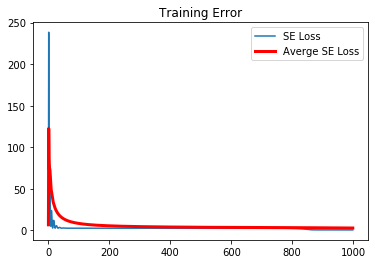

In [91]:
test = mc_dropout([1,128,128,1],d_rate = [1.0,1.0,1.0])
test.train(x, y,1000)

In [92]:
ns =100
sample = []
for _ in range(ns):
    y2 = test.forward_pass(test.params,np.reshape(x_linspace,(200,1)))
    sample.append(y2)
sample = np.array(sample)
sample = np.reshape(sample,(ns,200))
s_mean = sample.mean(axis=0)
s_sd = sample.std(axis=0)

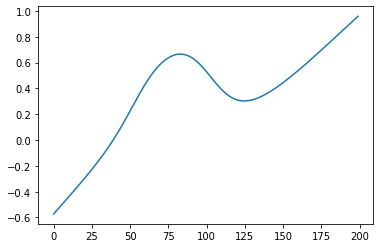

In [94]:
plt.plot(s_mean)

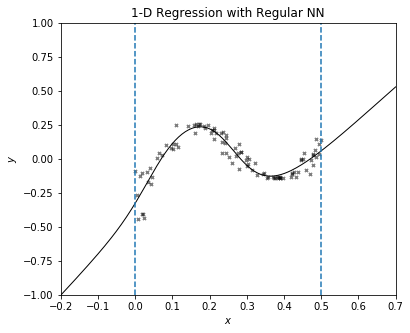

In [99]:
plt.figure(figsize = (6, 5))
plt.scatter(x,y - y_mean, s = 10, marker = 'x', color = 'black', alpha = 0.5)
plt.plot(x_linspace, s_mean - y_mean, color = 'black', linewidth = 1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim((-0.2, 0.7))
plt.title('1-D Regression with Regular NN')
plt.tick_params()
#plt.legend()
plt.ylim((-1,1))
plt.axvline(x=0, linestyle='--')
plt.axvline(x=0.5, linestyle='--')
plt.savefig('reg_homo.pdf', bbox_inches = 'tight')
plt.show()

ValueError: x and y must be the same size

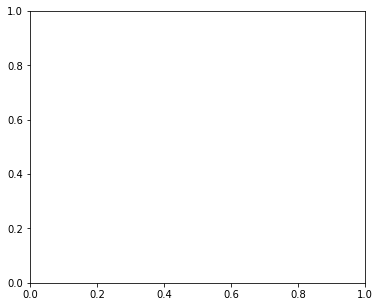

In [79]:
plt.figure(figsize = (6, 5))
plt.scatter(x,y - y_mean, s = 10, marker = 'x', color = 'black', alpha = 0.5)
plt.fill_between(x_linspace.reshape(200,), (means - 1.96*std).reshape(200,), (means + 1.96*std).reshape(200,), color = 'red', alpha = 0.3, label = '95% Confidence')
plt.fill_between(x_linspace.reshape(200,), (means - 2.58*std).reshape(200,), (means - 1.96*std).reshape(200,), color = 'blue', alpha = 0.3, label = '99% Confidence')
plt.fill_between(x_linspace.reshape(200,), (means + 1.96*std).reshape(200,), (means + 2.58*std).reshape(200,), color = 'blue', alpha = 0.3)

plt.plot(x_linspace, means, color = 'black', linewidth = 1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim((-0.2, 0.7))
plt.title('1-D Regression with GP')
plt.tick_params()
plt.legend()
plt.ylim((-1,1))
plt.axvline(x=0, linestyle='--')
plt.axvline(x=0.5, linestyle='--')
plt.savefig('reg_homo.pdf', bbox_inches = 'tight')
plt.show()